In [1]:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle

from tqdm import tqdm

import amelia_datatools.utils.common as C
from amelia_datatools.utils.utils import get_airport_list


out_dir = f"{C.OUTPUT_DIR}/crowdedness"
os.makedirs(out_dir, exist_ok=True)

In [2]:
airports = get_airport_list()
num_airports = len(airports)
num_airports

14

In [3]:
fig, ax = plt.subplots(num_airports, 1, figsize=(8, 8*num_airports))
fontcolor = 'dimgray'
for na, airport in enumerate(airports):
    crowdedness_file = os.path.join(out_dir, f'{airport}.pkl')
    if not os.path.exists(crowdedness_file):
        print(f"File {crowdedness_file} does not exist. Skipping...")
        continue
    with open(crowdedness_file, 'rb') as f:
        x = pickle.load(f)
    hour = np.zeros(shape=(len(x.keys())))
    min_agents = np.zeros(shape=(len(x.keys())))
    mean_agents = np.zeros(shape=(len(x.keys())))
    max_agents = np.zeros(shape=(len(x.keys())))
    median_agents = np.zeros(shape=(len(x.keys())))
    for i, (k, v) in enumerate(x.items()):

        hour[i] = int(k)
        if len(v) == 0:
            v = [0]
        v = np.asarray(v)
        min_agents[i] = v.min()
        mean_agents[i] = v.mean()
        max_agents[i] = v.max()
        median_agents[i] = np.median(v)

    if airport not in C.AIRPORT_COLORMAP:
        C.AIRPORT_COLORMAP[airport] = "black"
    color = C.AIRPORT_COLORMAP[airport]
    ax[na].plot(hour, min_agents, color=color, alpha=0.1)
    ax[na].plot(
        hour,
        max_agents,
        color=color,
        alpha=0.3,
        label=airport.upper(),
        linewidth=3
    )
    ax[na].fill_between(
        hour,
        min_agents,
        max_agents,
        interpolate=False,
        color=color,
        alpha=0.05
    )

    data = {'time': [], 'num_agents': []}
    for time, num_agents_arr in tqdm(x.items()):
        for num_agents in num_agents_arr:
            data['time'].append(int(time))
            data['num_agents'].append(num_agents)
    df = pd.DataFrame(data)


    sns.boxplot(
        data=data,
        x="time",
        y="num_agents",
        color=color,
        medianprops={"color": color, "linewidth": 4},
        showfliers=False,
        boxprops=dict(alpha=0.6),
        zorder=100,
        ax=ax[na]
    )
    ax[na].set_xticks(np.arange(hour.min(), hour.max()+1, 4))
    ax[na].legend(loc='upper right', labelcolor=fontcolor, fontsize=20)
    ax[na].set(xlabel=None)
ax[-1].set_xlabel('Time of Day', color=fontcolor, fontsize=20)

for a in ax:
    a.tick_params(color=fontcolor, labelcolor=fontcolor)
    for spine in a.spines.values():
        spine.set_edgecolor('gray')
        a.set_ylabel('Number of Aircraft', color=fontcolor, fontsize=20)

plt.savefig(f"{out_dir}/crowdedness_boxplots.png", dpi=400, bbox_inches='tight')
print("Saving in: ", f"{out_dir}/crowdedness_boxplots.png",)
plt.close()

100%|██████████| 24/24 [00:00<00:00, 57.45it/s]


Saving in:  /Users/alonso.cano/Developer/CMU/Amelia/AmeliaDataTools/output/crowdedness/crowdedness_boxplots.png


TypeError: list indices must be integers or slices, not str

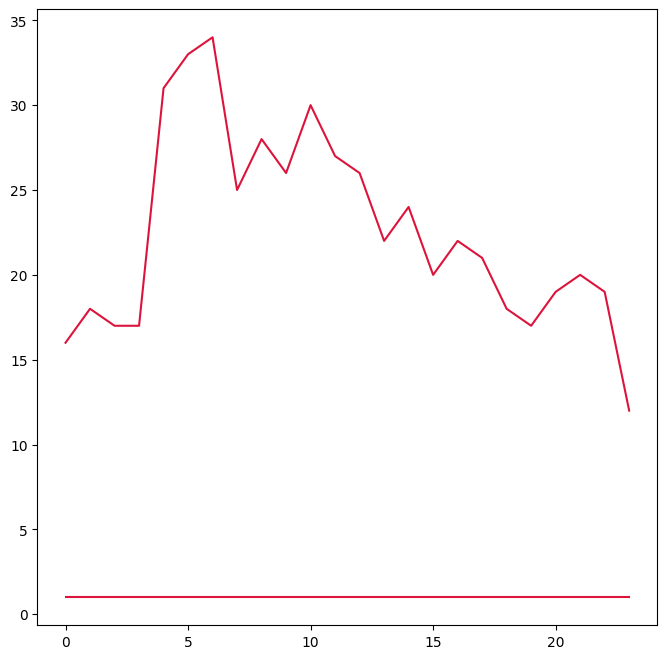

In [ ]:
for ap1 in airports:
    fig, ax = plt.subplots(figsize=(8, 8))
    for airport in airports:

        crowdedness_file = os.path.join(out_dir, f'{airport}.pkl')
        if not os.path.exists(crowdedness_file):
            print(f"File {crowdedness_file} does not exist. Skipping...")
            continue

        with open(crowdedness_file, 'rb') as f:
            x = pickle.load(f)

        time = np.zeros(shape=(len(x.keys())))
        min_agents = np.zeros(shape=(len(x.keys())))
        mean_agents = np.zeros(shape=(len(x.keys())))
        max_agents = np.zeros(shape=(len(x.keys())))
        median_agents = np.zeros(shape=(len(x.keys())))

        for i, (k, v) in enumerate(x.items()):
            time[i] = int(k)
            if len(v) == 0:
                v = [0]
            v = np.asarray(v)
            min_agents[i] = v.min()
            mean_agents[i] = v.mean()
            max_agents[i] = v.max()
            median_agents[i] = np.median(v)

        alpha = 1.0 if airport == ap1 else 0.25
        order = 1000 if airport == ap1 else 1

        if airport not in C.AIRPORT_COLORMAP:
            C.AIRPORT_COLORMAP[airport] = "black"
        color = C.AIRPORT_COLORMAP[airport]

        ax.plot(time, min_agents, color=color, alpha=alpha, zorder=order)
        ax.plot(time, max_agents, color=color, alpha=alpha, zorder=order)
        if airport == ap1:
            ax.plot(
                time, mean_agents, color='white', linewidth=2, linestyle='--', alpha=alpha,
                zorder=order+100)
        ax.fill_between(
            time, min_agents, max_agents, interpolate=False, color=color, alpha=alpha)

    plt.xticks(np.arange(time.min(), time.max()+1, 2))
    plt.title(f"Crowdedness {ap1.upper()}")
    plt.savefig(f"{out_dir}/{ap1}_areaplots.png", dpi=600, bbox_inches='tight')
    plt.close()